In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker 

file1 = 'sensors2024.csv'
dateBegin1 = '2024-04-01 00'
dateEnd1 = '2024-05-15 13'
dateBegin2 = '2024-04-10'
dateEnd2 = '2024-04-21'
df1 = pd.read_csv(file1)
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
df1 = df1.set_index('Timestamp')

file2 = 'downlink_receiver.csv'
df2 = pd.read_csv(file2)
df2['timestamp'] = pd.to_datetime(df2['timestamp'])
df2 = df2.set_index('timestamp')

file3 = 'uplink_receiver.csv'
df3 = pd.read_csv(file3)
df3['timestamp'] = pd.to_datetime(df3['timestamp'])
df3 = df3.set_index('timestamp')

file4 = 'downlinkUDP_receiver.csv'
df4 = pd.read_csv(file4)
df4['timestamp'] = pd.to_datetime(df4['timestamp'])
df4 = df4.set_index('timestamp')

file5 = 'uplinkUDP_receiver.csv'
df5 = pd.read_csv(file5)
df5['timestamp'] = pd.to_datetime(df5['timestamp'])
df5 = df5.set_index('timestamp')


date_range1 = df1.loc[dateBegin1:dateEnd1]

In [2]:
date_range2 = df2.loc[dateBegin1:dateEnd1]
date_range3 = df3.loc[dateBegin1:dateEnd1]
date_range4 = df4.loc[dateBegin1:dateEnd1]
date_range5 = df5.loc[dateBegin1:dateEnd1]
#print(date_range1)
P0 = pd.to_numeric(df1['P0'])
bitrate1 = pd.to_numeric(date_range2['bitrate'])
bitrate2 = pd.to_numeric(date_range3['bitrate'])
bitrate2 = pd.to_numeric(date_range3['bitrate'])
print(P0.values)
for i in range(0,len(P0)):
    if (P0[i] > 300):
        P0[i] = 0
    P0[i] = P0[i] * 0.2
    #if (P0[i] > 0):
     #   print(P0[i])
df1=df1.assign(P0=P0.values)
print(date_range1)

[335   0   0 ...   0   0   0]
                     PS  P0  Temperature  Relative Humidity  \
Timestamp                                                     
2024-04-01 00:00:34   0   0         5.61              74.21   
2024-04-01 00:01:34   0   0         5.61              73.97   
2024-04-01 00:02:34   0   0         5.60              73.95   
2024-04-01 00:03:34   0   0         5.60              73.88   
2024-04-01 00:04:34   0   0         5.62              74.06   
...                  ..  ..          ...                ...   
2024-05-13 10:54:10   0   0        25.81              29.71   
2024-05-13 10:55:10   0   0        25.82              29.16   
2024-05-13 10:56:10   0   0        25.84              29.51   
2024-05-13 10:57:10   0   0        25.84              29.18   
2024-05-13 10:58:10   0   0        25.85              29.34   

                     Absolute Humidity  T_DEW  Pressure  
Timestamp                                                
2024-04-01 00:00:34               

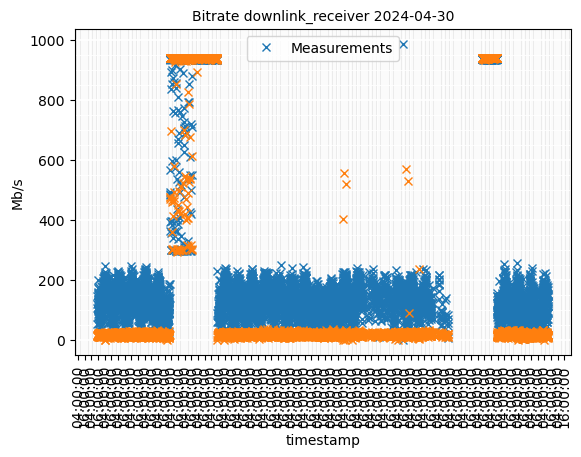

In [3]:
fig, ax = plt.subplots()
#P0.plot(ax=ax)
#bitrate.plot(ax=ax)
bitrate1.plot(ax=ax,ls='', marker='x')
bitrate2.plot(ax=ax,ls='', marker='x')
plt.ylabel('Mb/s')
plt.title('Bitrate downlink_receiver 2024-04-30', fontsize = 10) 
ax.set_facecolor('#EBEBEB')
ax.grid(which='major', color='white', linewidth=1.2)
ax.grid(which='minor', color='white', linewidth=0.6)
ax.minorticks_on()
ax.legend(['Measurements'])
ax.xaxis.set_major_locator(mdates.HourLocator(interval=12))
for label in ax.get_xticklabels():
    label.set_rotation(90)  # Rotate 90 degrees
    label.set_horizontalalignment('center')
ax.tick_params(which='minor', bottom=False, left=False)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

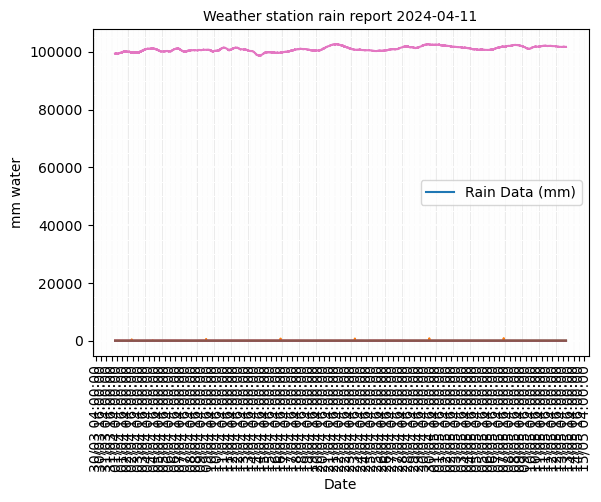

In [4]:
fig, ax = plt.subplots()
dates = date_range1.index.date
date_range1=date_range1.assign(dates=dates)
date_range1.plot(ax=ax)
plt.xlabel('Date')
plt.ylabel('mm water')
plt.title('Weather station rain report 2024-04-11', fontsize = 10) 
ax.set_facecolor('#EBEBEB')
ax.grid(which='major', color='white', linewidth=1.2)
ax.grid(which='minor', color='white', linewidth=0.7)
ax.minorticks_on()
ax.legend(['Rain Data (mm)'])
ax.xaxis.set_major_locator(mdates.HourLocator(interval=12))
for label in ax.get_xticklabels():
    label.set_rotation(90)  # Rotate 90 degrees
    label.set_horizontalalignment('center')
ax.tick_params(axis='y',which='minor', bottom=False, left=False)
ax.tick_params(axis='x',which='minor', bottom=False, left=False,labelrotation=90)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m %H:%M:%S'))

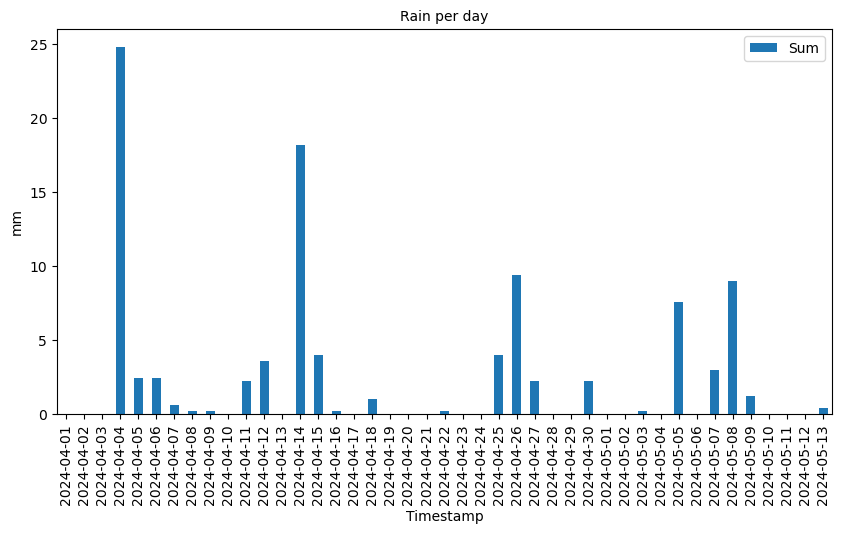

In [18]:
date_rangeH = df1.loc[dateBegin1:dateEnd1]
date_rangeB = df2.loc[dateBegin1:dateEnd1]
#daily_max = date_rangeB['bitrate'].resample("D").max().plot()
#daily_min = date_rangeB['bitrate'].resample("D").min().plot()
#daily_mean = date_rangeB['bitrate'].resample("D").mean().plot()
rain = date_rangeH['P0'].resample("D").sum()
rain.index = pd.to_datetime(rain.index, format = '%Y-%m-%d').strftime('%Y-%m-%d')
rain.plot(kind='bar',figsize=(10, 5))
plt.ylabel('mm')
plt.title('Rain per day', fontsize = 10) 
#plt.set_facecolor('#EBEBEB')
plt.legend(['Sum¢'])
plt.show()

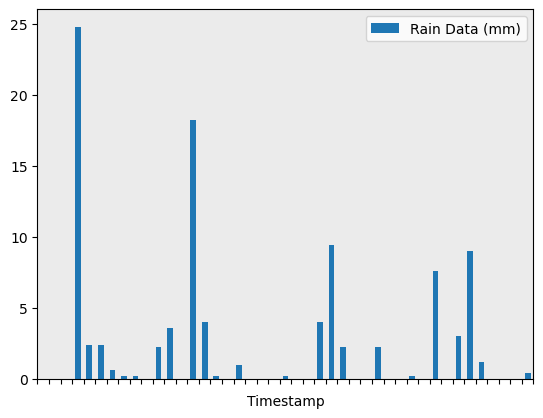

In [6]:
df1 = df1.loc[dateBegin1:dateEnd1]
fig, ax = plt.subplots()
df1rainHourly = df1.resample('D').sum()
df1rainHourly.index = pd.to_datetime(df1rainHourly.index, format = '%Y-%m-%d %H:%M:%S')
df1rainHourly['P0'].plot(ax=ax,kind='bar')
ax.set_facecolor('#EBEBEB')
ax.minorticks_on()
ax.legend(['Rain Data (mm)'])
ax.xaxis.set_major_locator(mdates.HourLocator(interval=24))
#ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
for label in ax.get_xticklabels():
    label.set_rotation(90)  # Rotate 90 degrees
    label.set_horizontalalignment('center')
ax.tick_params(axis='y',which='minor', bottom=False, left=False)
ax.tick_params(axis='x',which='minor', bottom=False, left=False,labelrotation=90)
plt.show()

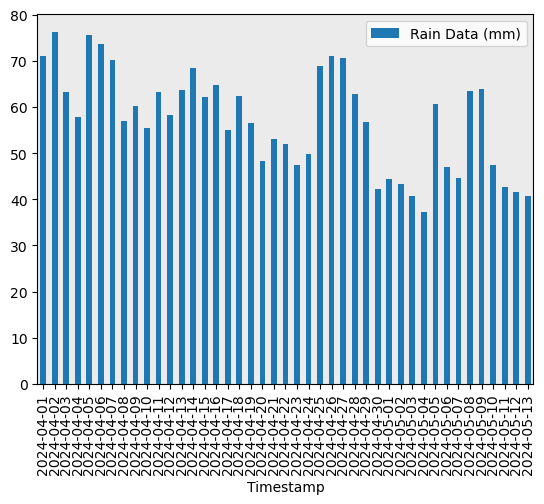

In [7]:
fig, ax = plt.subplots()
df1rhDaily = df1.resample('D').mean()
df1rhDaily.index = pd.to_datetime(df1rhDaily.index, format = '%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d')
df1rhDaily['Relative Humidity'].plot(ax=ax,kind='bar')
ax.set_facecolor('#EBEBEB')
ax.minorticks_on()
ax.legend(['Rain Data (mm)'])
ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) 
#ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
for label in ax.get_xticklabels():
    label.set_rotation(90)  # Rotate 90 degrees
    label.set_horizontalalignment('center')
ax.tick_params(axis='y',which='minor', bottom=False, left=False)
ax.tick_params(axis='x',which='minor', bottom=False, left=False,labelrotation=90)
plt.show()

In [8]:
print(df1rainHourly['P0'])

Timestamp
2024-04-01     0.0
2024-04-02     0.0
2024-04-03     0.0
2024-04-04    24.8
2024-04-05     2.4
2024-04-06     2.4
2024-04-07     0.6
2024-04-08     0.2
2024-04-09     0.2
2024-04-10     0.0
2024-04-11     2.2
2024-04-12     3.6
2024-04-13     0.0
2024-04-14    18.2
2024-04-15     4.0
2024-04-16     0.2
2024-04-17     0.0
2024-04-18     1.0
2024-04-19     0.0
2024-04-20     0.0
2024-04-21     0.0
2024-04-22     0.2
2024-04-23     0.0
2024-04-24     0.0
2024-04-25     4.0
2024-04-26     9.4
2024-04-27     2.2
2024-04-28     0.0
2024-04-29     0.0
2024-04-30     2.2
2024-05-01     0.0
2024-05-02     0.0
2024-05-03     0.2
2024-05-04     0.0
2024-05-05     7.6
2024-05-06     0.0
2024-05-07     3.0
2024-05-08     9.0
2024-05-09     1.2
2024-05-10     0.0
2024-05-11     0.0
2024-05-12     0.0
2024-05-13     0.4
Freq: D, Name: P0, dtype: float64
